In [1]:
from sklearn import svm
from sklearn.model_selection import KFold
# from sklearn.cross_validation import cross_val_score
import pandas as pd
import numpy as np
from sklearn import metrics

clf = svm.SVC()
use_jrnl_metrics=False

raw_data=pd.read_csv(r"RandomData.csv")

In [2]:
raw_data = raw_data.sample(frac=1).reset_index(drop=True)
train = raw_data.sample(frac=0.8, random_state=1)
test = raw_data.loc[~raw_data.index.isin(train.index)]
# , "q&a", "pinterest", "citeulike", "connotea"
data_columns=["mendeley", "twitter", "reddit", "q&a", "pinterest", "citeulike", "connotea", "facebook", "googleplus", "blogs", "video", "wikipedia", "weibo", "peer_reviews", "policy"]
#if use_jrnl_metrics:
#    data_columns.append("h_index")
train_data_array=train.as_matrix(columns=data_columns)
train_class_array= train['news'].values
test_data_array=test.as_matrix(columns=data_columns)
test_class_array= test['news'].values


In [3]:
kf=KFold(n_splits=10, random_state=None, shuffle=False)
validation_score=0
for train_index, test_index in kf.split(train_data_array):
    X_train, X_test = train_data_array[train_index], train_data_array[test_index]
    y_train, y_test = train_class_array[train_index], train_class_array[test_index]
    clf.fit(X_train, y_train)
    validation_pred=clf.predict(X_test)
    validation_score+=metrics.accuracy_score(y_test,validation_pred)

print("Validation Accuracy:   %0.3f" % (validation_score/kf.get_n_splits()))

pred = clf.predict(test_data_array)
score = metrics.accuracy_score(test_class_array, pred)
print("Accuracy:   %0.3f" % score)

score = metrics.precision_score(test_class_array, pred)
print("Precision:   %0.3f" % score)

score = metrics.recall_score(test_class_array, pred)
print("Recall:   %0.3f" % score)

score = metrics.f1_score(test_class_array, pred)
print("F-measure:   %0.3f" % score)

Validation Accuracy:   0.888
Accuracy:   0.888
Precision:   0.806
Recall:   0.326
F-measure:   0.465


In [4]:
def perf_measure(test_class_array, pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(pred)): 
        if test_class_array[i]==pred[i]==1:
           TP += 1
    for i in range(len(pred)): 
        if (pred[i]==1 - test_class_array).all()!=pred[i]:
           FP += 1
    for i in range(len(pred)): 
        if test_class_array[i]==pred[i]==0:
           TN += 1
    for i in range(len(pred)): 
        if (pred[i]==0 - test_class_array).all()!=pred[i]:
           FN += 1
        
        return(TP, FP, TN, FN)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\legend.py:325: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	lower right
	right
	upper center
	center
	lower center
	upper right
	best
	center right
	lower left
	upper left
	center left

  six.iterkeys(self.codes))))


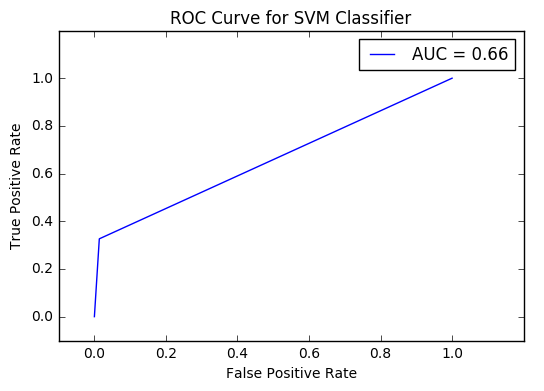

In [6]:
#roc = roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fp, tp, th = roc_curve(test_class_array, pred)
roc_auc = auc(fp, tp)
plt.title('ROC Curve for SVM Classifier')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower_right')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()